# Bibliotecas

In [2]:
# Bibliotecas a utilizar 
import numpy                   as     np                 # Uso de álgebra lineal, funciones vectoriales
import pandas                  as     pd                 # Trabajar con DataFrames
import matplotlib.pyplot       as     plt                # Para realizar gráficas
import seaborn                 as     sns                # Otras funciones para graficar

from sklearn.linear_model          import LogisticRegression            # Model Logistico
from sklearn.naive_bayes           import GaussianNB                    # Modelo NaiveBayes
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis    # Modelo LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis # Modelo QDA

from sklearn.metrics               import accuracy_score     # Función para calcular la precisión de clasificación
from sklearn.metrics               import confusion_matrix   # Función para calcular una matriz de confusión
from sklearn.model_selection       import KFold              # Función para realizar K-Fold Cross Validation
from sklearn.model_selection       import cross_val_score    # Función para realizar K-Fold-Cross Validation 

import warnings
warnings.filterwarnings('ignore')
sns.set()

# Análisis Descriptivo

In [21]:
# Leemos nuestros archivos 
#datos = pd.read_csv("iris.csv")   # Datos con 3 clases
datos = pd.read_csv("rock.csv")   # Datos con 12 clases
datos.sample(10)

area      peri     shape    perm type_desc
21  11876  4353.140  0.291029   142.0    rock_6
9    6425  3098.650  0.162394   119.0    rock_3
1    7002  3892.600  0.148622     6.3    rock_1
28   6509  1851.210  0.225214   890.0    rock_8
7    8209  4344.750  0.164127    17.1    rock_2
4    7943  3948.540  0.122417    17.1    rock_2
5    7979  4010.150  0.167045    17.1    rock_2
33   5318   990.388  0.326635   950.0    rock_9
41   1016   308.642  0.230081  1300.0   rock_11
29   4895  1239.660  0.341273   890.0    rock_8

[]

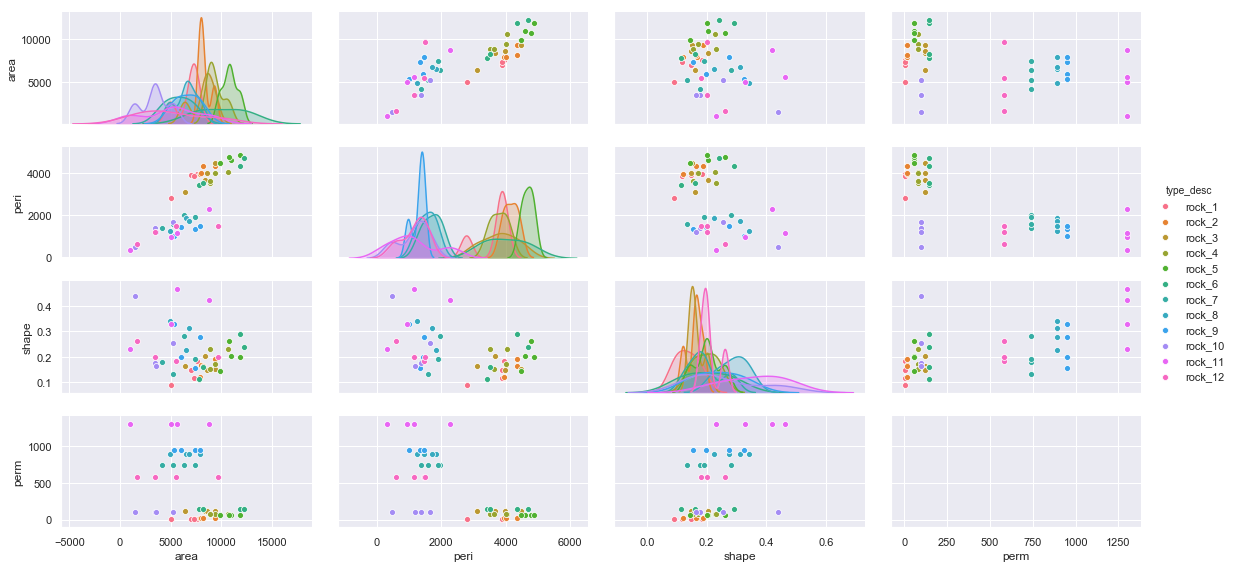

In [22]:
sns.pairplot(datos, hue = "type_desc", height=2, aspect=2)
plt.plot()

In [23]:
matriz_diseño = datos.iloc[:,0:4]
y_real        = datos.iloc[:,  4]
matriz_diseño.head()

area     peri     shape  perm
0  4990  2791.90  0.090330   6.3
1  7002  3892.60  0.148622   6.3
2  7558  3930.66  0.183312   6.3
3  7352  3869.32  0.117063   6.3
4  7943  3948.54  0.122417  17.1

# Análisis de modelos individuales

# Análisis de sobreajuste 

In [24]:
modelo     = LogisticRegression(C=1.0, penalty="l2",fit_intercept=True,class_weight=None)
k_fold     = KFold(n_splits=10, shuffle=True, random_state=0)
score      = cross_val_score( modelo, matriz_diseño, y_real, cv=k_fold, n_jobs=1, scoring="accuracy",)
print( "Precisiones:         ", [ str( np.round(100*x,1) ) + "%" for x in score] )
print( "Precisión Min y Max: ", [ str( np.round(100*x,1) ) + "%" for x in [np.min(score),np.max(score)] ] )
print( "Precisión puntual:   ", [ str( np.round(100*x,1) ) + "%" for x in [ np.mean(score) ] ]  )

Precisiones:          ['20.0%', '80.0%', '40.0%', '20.0%', '60.0%', '20.0%', '40.0%', '0.0%', '25.0%', '50.0%']
Precisión Min y Max:  ['0.0%', '80.0%']
Precisión puntual:    ['35.5%']


In [25]:
modelo     = GaussianNB(priors=None, var_smoothing=1e-09)
k_fold     = KFold(n_splits=10, shuffle=True, random_state=0)
score      = cross_val_score( modelo, matriz_diseño, y_real, cv=k_fold, n_jobs=1, scoring="accuracy")
print( "Precisiones:         ", [ str( np.round(100*x,1) ) + "%" for x in score] )
print( "Precisión Min y Max: ", [ str( np.round(100*x,1) ) + "%" for x in [np.min(score),np.max(score)] ] )
print( "Precisión puntual:   ", [ str( np.round(100*x,1) ) + "%" for x in [ np.mean(score) ] ]  )

Precisiones:          ['100.0%', '100.0%', '100.0%', '100.0%', '100.0%', '100.0%', '80.0%', '100.0%', '100.0%', '100.0%']
Precisión Min y Max:  ['80.0%', '100.0%']
Precisión puntual:    ['98.0%']


In [26]:
modelo     = LinearDiscriminantAnalysis(n_components=None, tol=0.0001)
k_fold     = KFold(n_splits=10, shuffle=True, random_state=0)
score      = cross_val_score( modelo, matriz_diseño, y_real, cv=k_fold, n_jobs=1, scoring="accuracy")
print( "Precisiones:         ", [ str( np.round(100*x,1) ) + "%" for x in score] )
print( "Precisión Min y Max: ", [ str( np.round(100*x,1) ) + "%" for x in [np.min(score),np.max(score)] ] )
print( "Precisión puntual:   ", [ str( np.round(100*x,1) ) + "%" for x in [ np.mean(score) ] ]  )

Precisiones:          ['20.0%', '40.0%', '40.0%', '20.0%', '40.0%', '20.0%', '20.0%', '0.0%', '0.0%', '0.0%']
Precisión Min y Max:  ['0.0%', '40.0%']
Precisión puntual:    ['20.0%']


In [27]:
modelo     = QuadraticDiscriminantAnalysis(priors=None,reg_param=0.0, store_covariance=False,tol=0.0001,store_covariances=None)
k_fold     = KFold(n_splits=10, shuffle=True, random_state=0)
score      = cross_val_score( modelo, matriz_diseño, y_real, cv=k_fold, n_jobs=1, scoring="accuracy")
print( "Precisiones:         ", [ str( np.round(100*x,1) ) + "%" for x in score] )
print( "Precisión Min y Max: ", [ str( np.round(100*x,1) ) + "%" for x in [np.min(score),np.max(score)] ] )
print( "Precisión puntual:   ", [ str( np.round(100*x,1) ) + "%" for x in [ np.mean(score) ] ]  )

Precisiones:          ['0.0%', '0.0%', '0.0%', '0.0%', '0.0%', '0.0%', '0.0%', '0.0%', '0.0%', '0.0%']
Precisión Min y Max:  ['0.0%', '0.0%']
Precisión puntual:    ['0.0%']


# Modelo final

In [28]:
modelo     = GaussianNB(priors=None, var_smoothing=1e-09)
modelo_final

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [29]:
modelo_final.fit( X = matriz_diseño, y = y_real )
y_estimada = modelo_final.predict( X = matriz_diseño )
y_estimada[0:10]

array(['rock_1', 'rock_2', 'rock_2', 'rock_1', 'rock_2', 'rock_2',
       'rock_2', 'rock_2', 'rock_4', 'rock_4'], dtype='<U7')

In [30]:
print( "Precisión: ", str( np.round( 100*accuracy_score( y_true = y_real, y_pred = y_estimada ),2) ) + "%" )

Precisión:  45.83%
